## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

### Problem Statements 
1. Does an association exist between creativity and left-handedness?

2. Do people who are attention to detail to be left-handed?

3. Do people who are like exciting to be left-handed?

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [40]:
# Library imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# Open dataset divided column by \t 
df = pd.read_csv("./data.csv", sep="\t")

In [3]:
# View dataset
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [4]:
# Check shape
df.shape

(4184, 56)

---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

In [5]:
# Check dtypes 
list(df.columns)

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44',
 'introelapse',
 'testelapse',
 'country',
 'fromgoogle',
 'engnat',
 'age',
 'education',
 'gender',
 'orientation',
 'race',
 'religion',
 'hand']

In [6]:
# Disregard other features(not necessary)
# Unrelated to the personality trait(topic and problem statement to study)
# And related to ethics/privacy(sensitive topics)
drop_columns = ['introelapse',
                 'testelapse',
                 'country',
                 'fromgoogle',
                 'engnat',
                 'age',
                 'education',
                 'gender',
                 'orientation',
                 'race',
                 'religion',]
df.drop(columns=drop_columns, inplace=True)

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [7]:
# Check columns
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'hand'],
      dtype='object')

In [8]:
# Check dtypes
df.dtypes

Q1      int64
Q2      int64
Q3      int64
Q4      int64
Q5      int64
Q6      int64
Q7      int64
Q8      int64
Q9      int64
Q10     int64
Q11     int64
Q12     int64
Q13     int64
Q14     int64
Q15     int64
Q16     int64
Q17     int64
Q18     int64
Q19     int64
Q20     int64
Q21     int64
Q22     int64
Q23     int64
Q24     int64
Q25     int64
Q26     int64
Q27     int64
Q28     int64
Q29     int64
Q30     int64
Q31     int64
Q32     int64
Q33     int64
Q34     int64
Q35     int64
Q36     int64
Q37     int64
Q38     int64
Q39     int64
Q40     int64
Q41     int64
Q42     int64
Q43     int64
Q44     int64
hand    int64
dtype: object

In [9]:
# Check missing values
df.isnull().sum().sum()

0

In [10]:
# Check an overview of data
# Q1-Q44 have values in the range (0-5)
# target label(hand) has values in the range (0-3)
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,2.610660,3.465344,2.798757,2.569312,2.984226,3.385277,2.704828,2.676386,2.736616,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,1.409707,1.521460,1.413584,1.621772,1.483752,1.423055,1.544345,1.523097,1.471845,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,2.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000


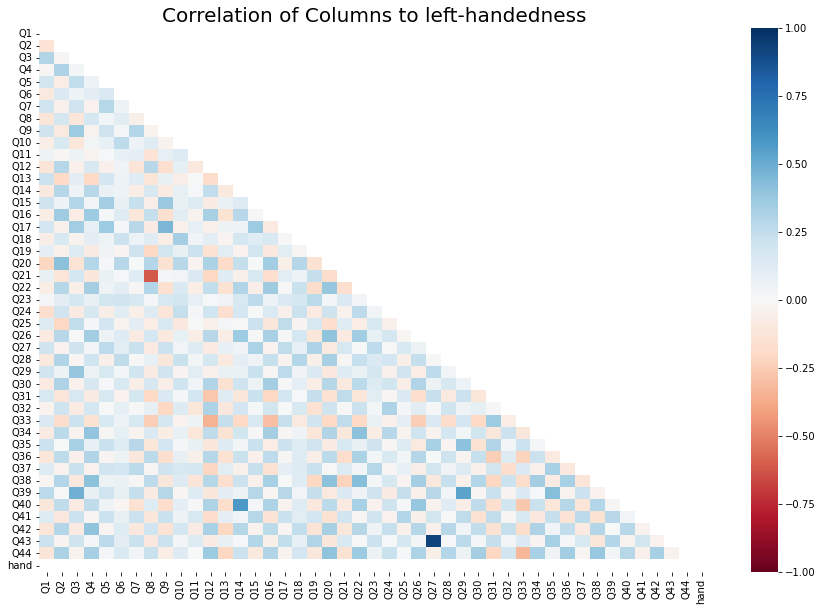

In [11]:
# Creating heatmap of left-handedness 
plt.figure(figsize=(15,10))
corr = df[df['hand'] == 2].corr().sort_values('hand', ascending=False)
matrix = np.triu(corr)
sns.heatmap(corr, annot = False, cmap = 'RdBu',
            mask=matrix, vmin=-1, vmax=1)
plt.title(label='Correlation of Columns to left-handedness', fontsize=20);

In [12]:
# Q27 and 43 were like duplicates
# Different, keep both columns
df[['hand', 'Q27', 'Q43']].head()

,hand,Q27,Q43
0,3,5,5
1,1,1,4
2,2,2,2
3,2,1,1
4,3,5,5


### Calculate and interpret the baseline accuracy rate:

In [13]:
# Check options for hand is 1=Right, 2=Left, 3=Both , 0 None answer
df["hand"].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [14]:
# Option for hand = 0 (not to use it for analysis)
# Because small % of values and we're clear on what 0 means but we think it's likely a missing value stand-in.
# Option for hand = 3(Both) (not to use it for analysis)
# Because we're not clear on what 3 means usually they use their left or right hand.
# And If we interpret it as using the left hand and bringing it together.
# ratio compared to the normal use of the left hand is quite large.
df['hand'].value_counts(normalize=True)*100

1    84.655832
2    10.803059
3     4.278203
0     0.262906
Name: hand, dtype: float64

In [15]:
# Create new columns keep only is left-handedness
# Ignore options 0 and 3 
df["left_handed"] = df["hand"].map({1:0, 2:1})

In [16]:
# Check rows have NaN 
df["left_handed"].isnull().sum()

190

In [17]:
# Drop row have missing values
df.dropna(inplace=True)

In [18]:
# Recheck
df["left_handed"].value_counts()

0.0    3542
1.0     452
Name: left_handed, dtype: int64

In [19]:
print(f'''Baseline Accuracy Rate : {round(df["left_handed"].mean()*100,4)}''')

Baseline Accuracy Rate : 11.317


### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

- Regression predicts continuous `numeric target values`.

- Classification predicts the `discrete or categories`(binary/class)

#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

In [20]:
# high bias -> underfitting
# high variance -> overfitting

# k is the number of neighbors that help kNN identify which class label
# a data point would belong in

# The relationship between k and bias-variance tradeoff is 
# the smaller k would result in low bias and high variance (overfitted).
# the larger k would result in high bias and low variance (underfitted).
# we need to adjust number of k to optimal number -> "the sweet spot"

#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

In [21]:
# predictor variables -> features or X
# kNN is distance based algorithm and scale/magnitude of features
# impacts performance and output.

# Standardization (StandardScaler) ->
# rescale values in the features columns to have
# each column possess a mean of zero and std of 1.

#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

In [22]:
# explanatory variables -> features or X

# Possibly not because the explanatory variables are 
# already in the same unit/scale of 1 to 5. 

# We need to scale if the units are different.

#### How do we settle on $k$ for a $k$-nearest neighbors model?

In [23]:
# Options

# 1. Use the default
# 2. Guess
# 3. Loop/iterate through a range of k options and select the 
# optimal one based on score(Elbow method)

# We find the optimal k by iterate over number of k to find the 
# low bias and variance using cross validation techniques.

#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

In [24]:
# L2 or Ridge is the default regularization for logistic regression.

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:

In [25]:
# Logistic Regression 
# Argument C is inverse relationship with regularization strength.
# The smaller values specify stronger regularization.

# C = 1/ alpha
# alpha = 1 -> C = 1
# alpha = 0.1 -> C = 10

# What does a higher C mean? Less regularization
# What does a lower C mean? MORE regularizationn

#### Describe the relationship between regularization strength and the bias-variance tradeoff:

In [26]:
# Why and when do we regularize?

# Why? Avoid error due to high variance (overfitting)
# When? High model complexity which is causing overfitting.

# C is high --> less regularization -> more prone to overfitting
# C is low --> MORE regularization -> less prone to overfitting and 
# if overdone, can lead to underfitting.


# Regularization strength have positive relationship with bias.
# Regularization strength have inverse relationship with variance.

# Zero to low regularization strength tends to have low bias and high variance.
# High regularization strength tends to have high bias and low variance.

# Moderate regularization strength tends to have the best result

In [27]:
# Don't regularize unless you need to.
# Turn penalty off.

#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

In [28]:
# Interpretable?
# Logistic regression have coefficients (statistical parameter) a.k.a. betas
# which can be used for explaination of the impacts of the factors while
# kNN is non-parametric and has no coefficients or statistical parameters.

# Explainable to non-technical individual?
# Conceptually, kNN isn't too hard to explain to a wide audience.

# Explaining relationships in a meaningful and actionable way?
# kNN fails and LogReg is better.

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be  

In [30]:
# Make variables of model
X = df.drop(columns=['hand','left_handed'])
y = df['left_handed']

In [31]:
# Train/test splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify= y,
                                                    random_state=42)
# We might want to stratify anyways 
# Due to imbalance class could magnify the difference.

In [32]:
# Checking the distribution of class labels in y_train
# and y_test to see if we want to stratify when splitting the data 
# Classification problem 
print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

0.0    88.681135
1.0    11.318865
Name: left_handed, dtype: float64
0.0    88.688689
1.0    11.311311
Name: left_handed, dtype: float64


In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2995, 44), (999, 44), (2995,), (999,))

#### Create and fit four separate $k$-nearest neighbors models: one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$:

In [34]:
# Instantiate the model
k_scores = pd.DataFrame(columns=["k","train_score","test_score","preds_one"])

# Loop through k's to create 
for n,k in enumerate([3,5,15,25]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    minority_class_preds = y_preds == 1
    preds_one = pd.Series(minority_class_preds).sum()
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    k_scores.loc[n] = [k, train_score, test_score,preds_one]

In [35]:
# Checking scores of each k neighbors -
# Accuracy in this classification case
k_scores

,k,train_score,test_score,preds_one
0,3.0,0.900167,0.857858,43.0
1,5.0,0.890484,0.888889,8.0
2,15.0,0.886811,0.886887,0.0
3,25.0,0.886811,0.886887,0.0


In [38]:
# As if the model would predicts 0(right handness)
# Remodel with selected k=3(can predict 1 left handness)
# For used in confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_preds = knn.predict(X_test)

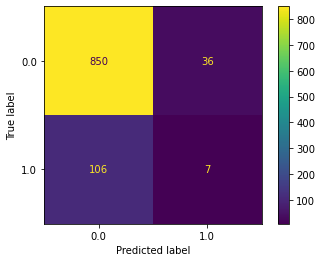

In [41]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_).plot();

In [50]:
# Even if model can predict but a lot of false positive 
# Model is bad to predict 

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [51]:
# Any of our kNN models overfit? No
# Any of our kNN models underfit? Not necessarily, but 
# the higher k test scores are the baseline accuracy
# Appears good on majority, bad on minority class

# The challenge here is not so much the algorithm or the # of k
# but the imbalanced class split along with a tenuous likely
# relationship between X and y

In [52]:
# The baseline accuracy
# If the algorithm just selected the majority for each of its
# prediction of y
# Algorithmic equivalent --> DummyClassifer set to `most_frequent`
y.value_counts(normalize=True).mul(100)[0]

88.6830245368052

In [53]:
y_test.value_counts(normalize=True).mul(100)[0]

88.68868868868869

In [54]:
# Options

# Addressing the class label imbalance 
# (switching k at 90/10 split made no significant difference 
# in models preditive accuracy)

# Find more left-handed people to survey.

# Oversampling the minority class.

# Undersampling the majority class.

# A bit of both (SMOTE) --> Synthetic Minority Over-Sampling Technique.

# Algorithmically increase the number of your cases 
# in your dataset in a more balanced way.

---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as above.

In [59]:
# Instantiate the model
logreg_scores = pd.DataFrame(columns=["penalty","alpha","train_score","test_score","preds_one"])

# Loop through hyperparameter to create 
n = 0
for p in (['l1','l2']):
    for a in (1,10):
        logreg = LogisticRegression(penalty=p, C=1/a, solver= "liblinear")
        logreg.fit(X_train, y_train)
        y_preds = logreg.predict(X_test)
        minority_class_preds = y_preds == 1
        preds_one = pd.Series(minority_class_preds).sum()
        train_score = logreg.score(X_train, y_train)
        test_score = logreg.score(X_test, y_test)
        logreg_scores.loc[n] = [p, a, train_score, test_score, preds_one]
        n += 1

In [60]:
# Checking scores of each hyperparameter 
logreg_scores

,penalty,alpha,train_score,test_score,preds_one
0,l1,1,0.886811,0.886887,0
1,l1,10,0.887145,0.886887,0
2,l2,1,0.886811,0.886887,0
3,l2,10,0.886811,0.886887,0


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

- Any of our logreg models overfit? No
- Any of our logreg models underfit? Not necessarily, but all model appears bad on minority class
- None of the models is better than the baseline model.

---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? What are the "best" models?

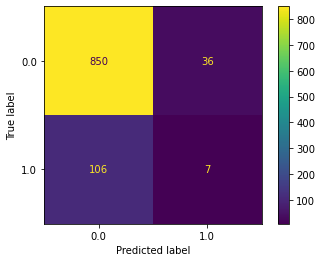

In [65]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
y_preds_knn3 = knn3.predict(X_test)
cm = confusion_matrix(y_test, y_preds_knn3)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn3.classes_).plot();

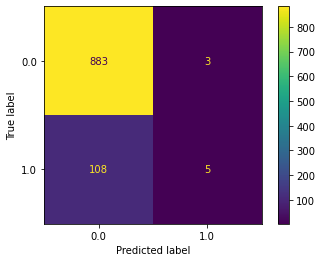

In [64]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
y_preds_knn5 = knn5.predict(X_test)
cm = confusion_matrix(y_test, y_preds_knn5)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn5.classes_).plot(tit);

Best model is probably the neighbors models with k at 3 or 5 neighbors number which can predict some minority class and have highest test score but they can not predict more than the baseline of 11.32% by predicting the minority class.